In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [10]:
#loading files

train = pd.read_csv("Book1.csv")
test = pd.read_csv("Book2.csv")

In [11]:
train_original = train.copy()
test_original = test.copy()

In [12]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Temperature', 'Heat Index', 'Humidity', 'Water flow',
        'Soil Moisture', 'Water quantity', 'Eto'],
       dtype='object'),
 Index(['ID', 'Datetime', 'Temperature', 'Heat Index', 'Humidity', 'Water flow',
        'Soil Moisture', 'Water quantity'],
       dtype='object'))

In [13]:
train.dtypes,test.dtypes


(ID                  int64
 Datetime           object
 Temperature       float64
 Heat Index        float64
 Humidity          float64
 Water flow          int64
 Soil Moisture     float64
 Water quantity    float64
 Eto               float64
 dtype: object, ID                  int64
 Datetime           object
 Temperature       float64
 Heat Index        float64
 Humidity          float64
 Water flow          int64
 Soil Moisture     float64
 Water quantity      int64
 dtype: object)

In [14]:
train.shape, test.shape

((5231, 9), (1745, 8))

In [18]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%m/%d/%Y') 
test['Datetime'] = pd.to_datetime(test.Datetime, format='%m/%d/%Y') 

In [19]:
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%m/%d/%Y')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%m/%d/%Y')

In [20]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [21]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [22]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

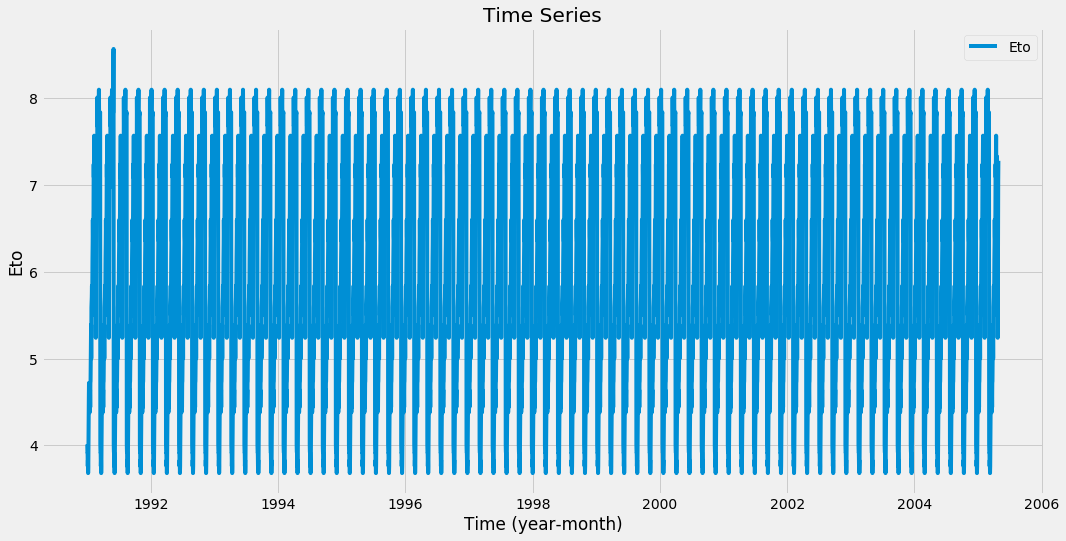

In [23]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Eto']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Eto")
plt.legend(loc = 'best')

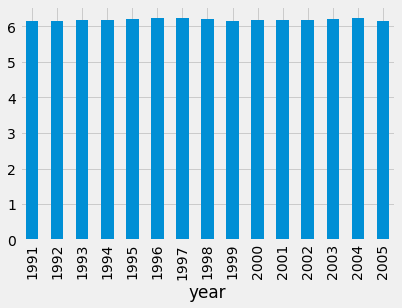

In [24]:
train.groupby('year')['Eto'].mean().plot.bar()

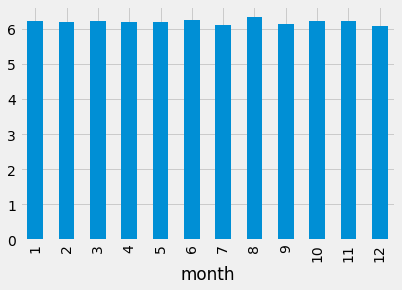

In [25]:
train.groupby('month')['Eto'].mean().plot.bar()

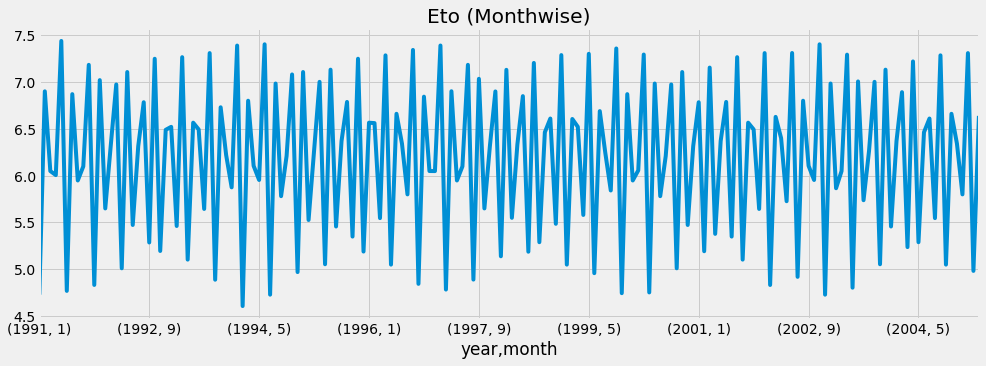

In [26]:
temp = train.groupby(['year', 'month'])['Eto'].mean()
temp.plot(figsize =(15,5), title = "Eto (Monthwise)", fontsize = 14)

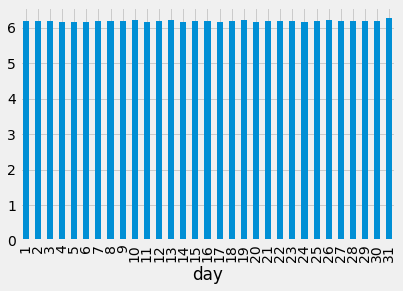

In [27]:
train.groupby('day') ['Eto'].mean().plot.bar()

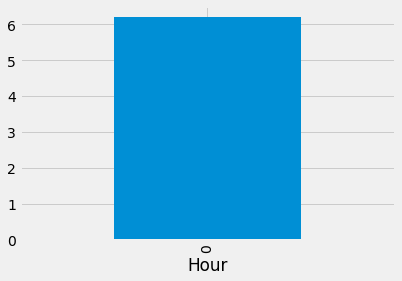

In [28]:
train.groupby('Hour')['Eto'].mean().plot.bar()


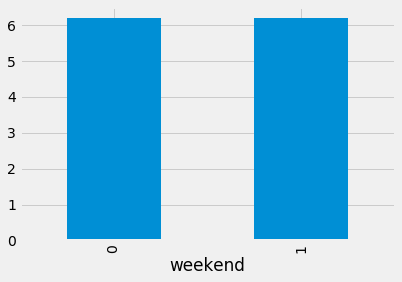

In [29]:
train.groupby('weekend') ['Eto'].mean().plot.bar()


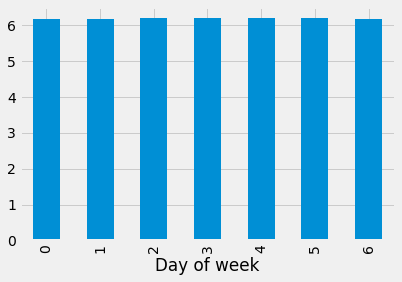

In [30]:
train.groupby('Day of week') ['Eto'].mean().plot.bar()

In [31]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%m/%d/%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

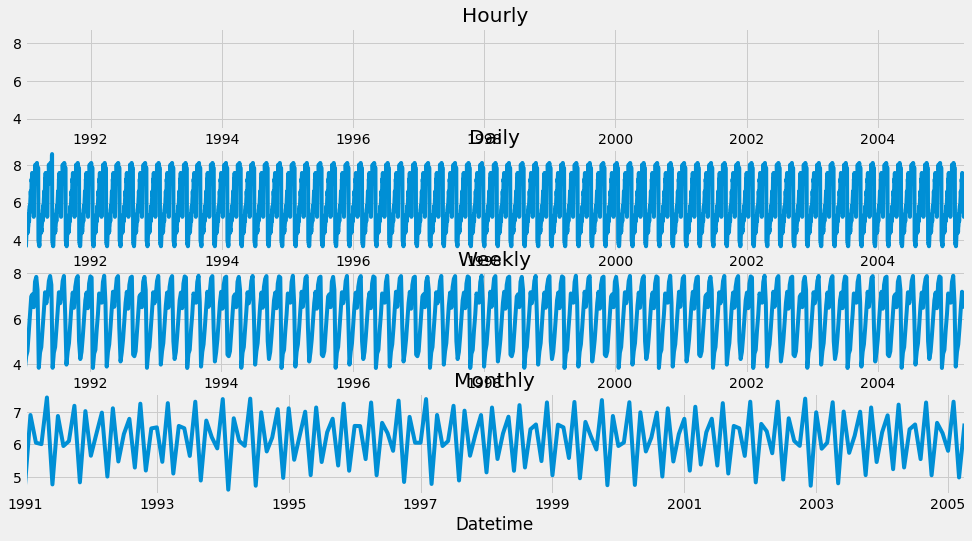

In [32]:
fig,axs = plt.subplots(4,1)

hourly.Eto.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Eto.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Eto.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Eto.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [33]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%m/%d/%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%m/%d/%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

In [34]:
#Divide data into training and validation

Train = train.ix['1/1/1991':'7/18/2000']
valid = train.ix['7/19/2000':'4/27/2005']

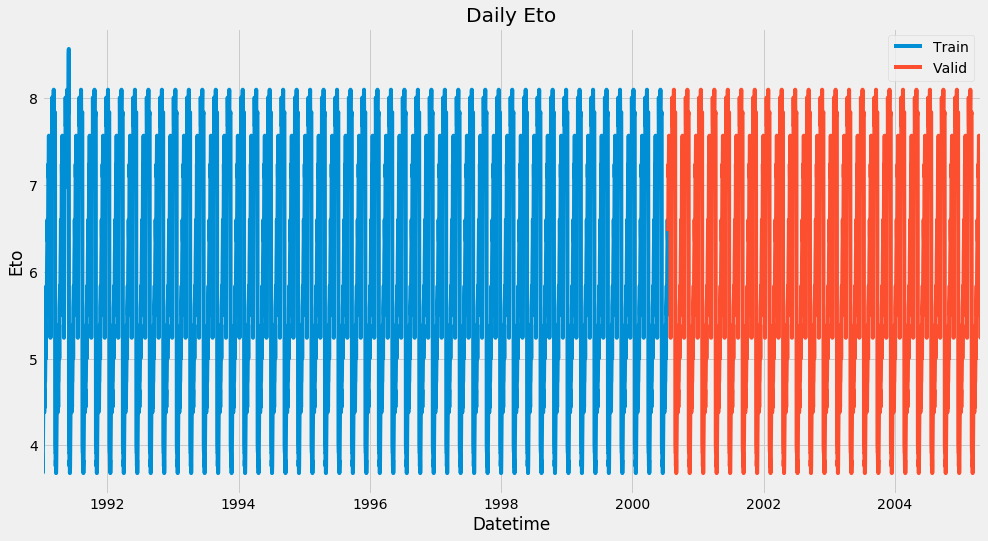

In [35]:
Train.Eto.plot(figsize = (15,8), title = 'Daily Eto', fontsize = 14, label = 'Train')
valid.Eto.plot(figsize = (15,8), title = 'Daily Eto', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Eto')
plt.legend(loc = 'best')

# NAIVE APPROACH

Text(0.5, 1.0, 'Naive Forecast')

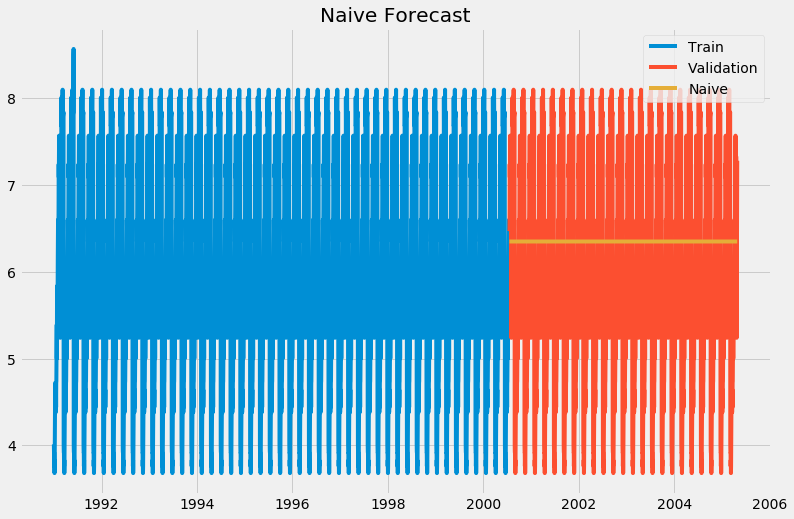

In [36]:
#Naive Approach

dd = np.asarray(Train.Eto)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Eto'],label = 'Train')
plt.plot(valid.index, valid['Eto'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [37]:
#Calculating RMS error for naive approach

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Eto, y_hat.naive))
rmse

1.4050518290091063

# MOVING AVERAGE FORECAST

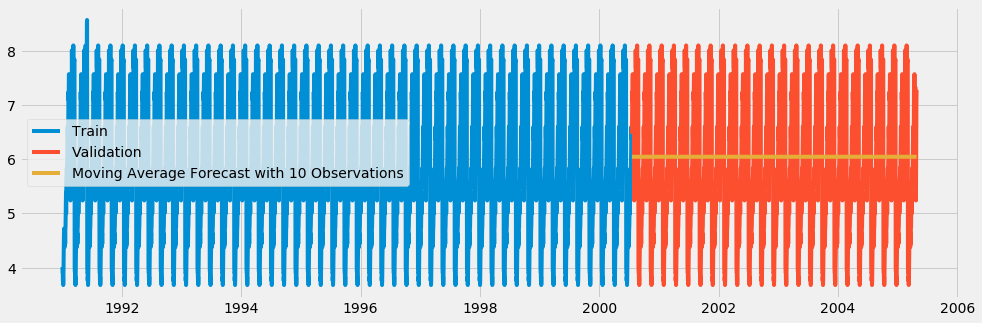

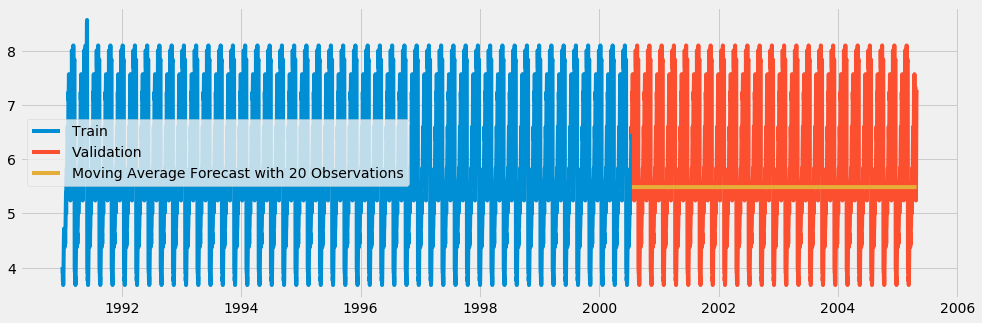

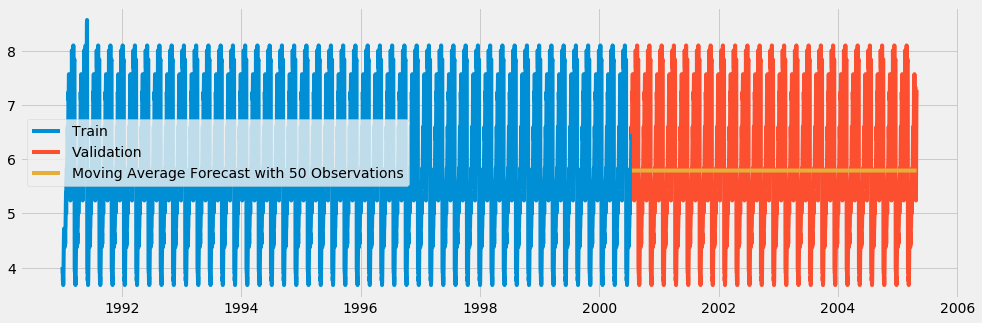

In [38]:
#Moving Average Forecast

y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Eto'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Eto'], label = 'Train')
plt.plot(valid['Eto'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Eto'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Eto'], label = 'Train')
plt.plot(valid['Eto'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Eto'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Eto'], label = 'Train')
plt.plot(valid['Eto'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [39]:
#RMS error for Moving Average

rmse = sqrt(mean_squared_error(valid['Eto'], y_hat_avg['moving_average_forecast']))
rmse

1.4571340860014075

# Simple Exponential Smoothing

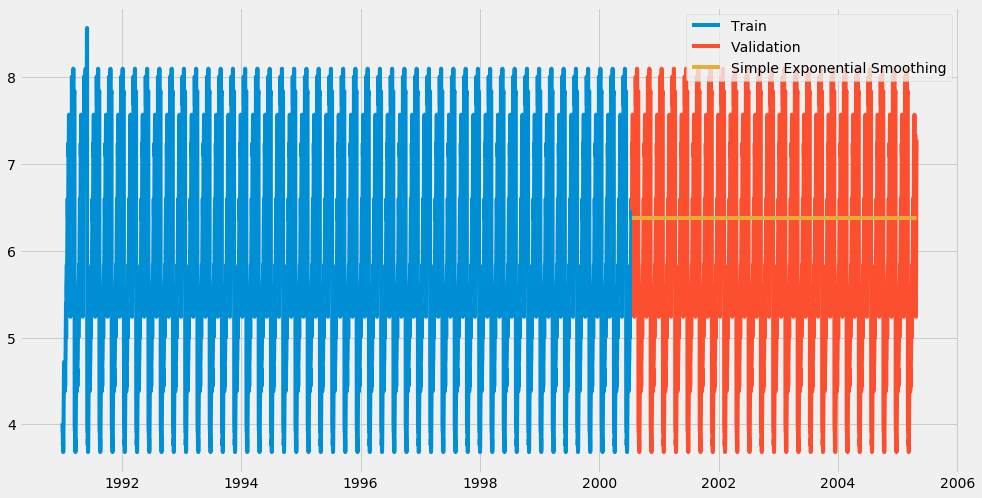

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Eto'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Eto'], label = 'Train')
plt.plot(valid['Eto'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

In [41]:
#RMS error for Simple smoothing
rmse = sqrt(mean_squared_error(valid.Eto, y_hat['SES']))
rmse

1.4083027316897045

# Holt's Linear Trend Model


<Figure size 1600x800 with 0 Axes>

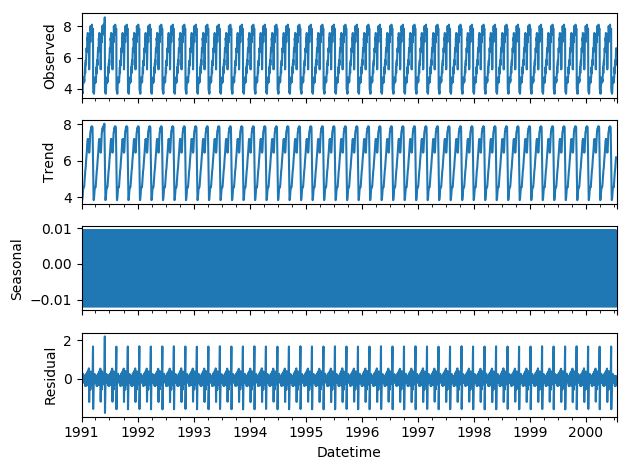

In [43]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Eto).plot()
result = sm.tsa.stattools.adfuller(train.Eto)
plt.show()

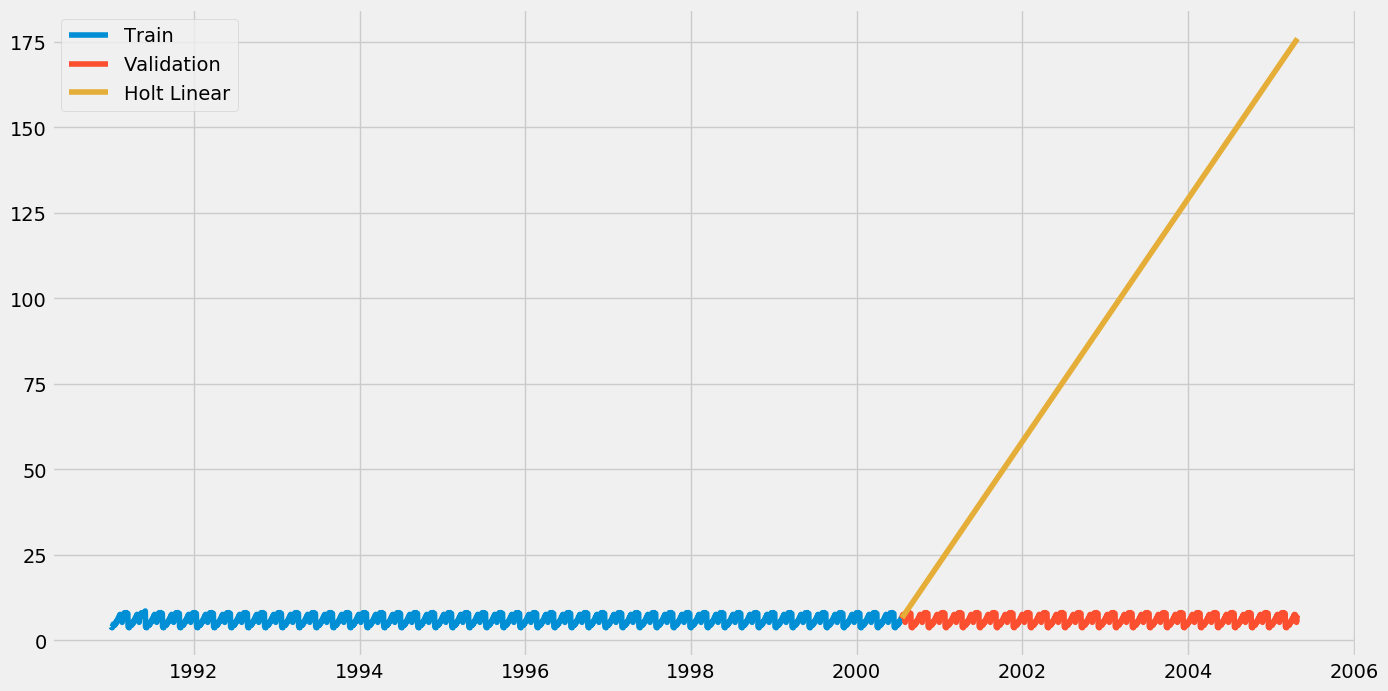

In [44]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Eto'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Eto, label = 'Train')
plt.plot(valid.Eto, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [45]:
rmse = sqrt(mean_squared_error(valid.Eto, y_hat_holt.Holt_linear))
rmse

98.15289583896674

In [46]:
# Make Predictions on test set
predict = fit1.forecast(len(test))
test['prediction'] = predict


In [48]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['Eto']/train_original['Eto'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby2.csv')
temp2 = pd.read_csv("Groupby2.csv")
temp2 =temp2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(test, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['Eto'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']
prediction.head()

ID_x  Temperature_x  Heat Index_x  Humidity_x  Water flow_x  \
0  5232           37.7         33.08         1.4             0   
1  5233           35.9         31.87         4.0             0   
2  5234           35.0         31.31         5.8             0   
3  5235           33.0         30.36        11.0             0   
4  5236           30.9         28.89        16.7             0   

   Soil Moisture_x  Water quantity_x  prediction  ID_y  Temperature_y  \
0            26.64                 0    6.572056  5232           37.7   
1            26.64                 0    6.669243  5233           35.9   
2            26.39                 0    6.766429  5234           35.0   
3            26.39                 0    6.863615  5235           33.0   
4            26.39                 0    6.960802  5236           30.9   

   Heat Index_y  Humidity_y  Water flow_y  Soil Moisture_y  Water quantity_y  \
0         33.08         1.4             0            26.64                 0   
1         31.87         4.0             0            26.64                 0   
2         31.31         5.8             0            26.39                 0   
3         30.36        11.0             0            26.39                 0   
4         28.89        16.7             0            26.39                 0   

   Hour  ratio         Eto    ID  
0     0    1.0  157.729354  5232  
1     0    1.0  160.061826  5233  
2     0    1.0  162.394297  5234  
3     0    1.0  164.726769  5235  
4     0    1.0  167.059240  5236

In [49]:
submission = prediction.drop(['ID_x','ID_y','prediction','Hour','ratio'], axis =1)
pd.DataFrame(submission, columns = ['ID','Eto']).to_csv('Holt_Linear2.csv')

# Holt Winter's Model

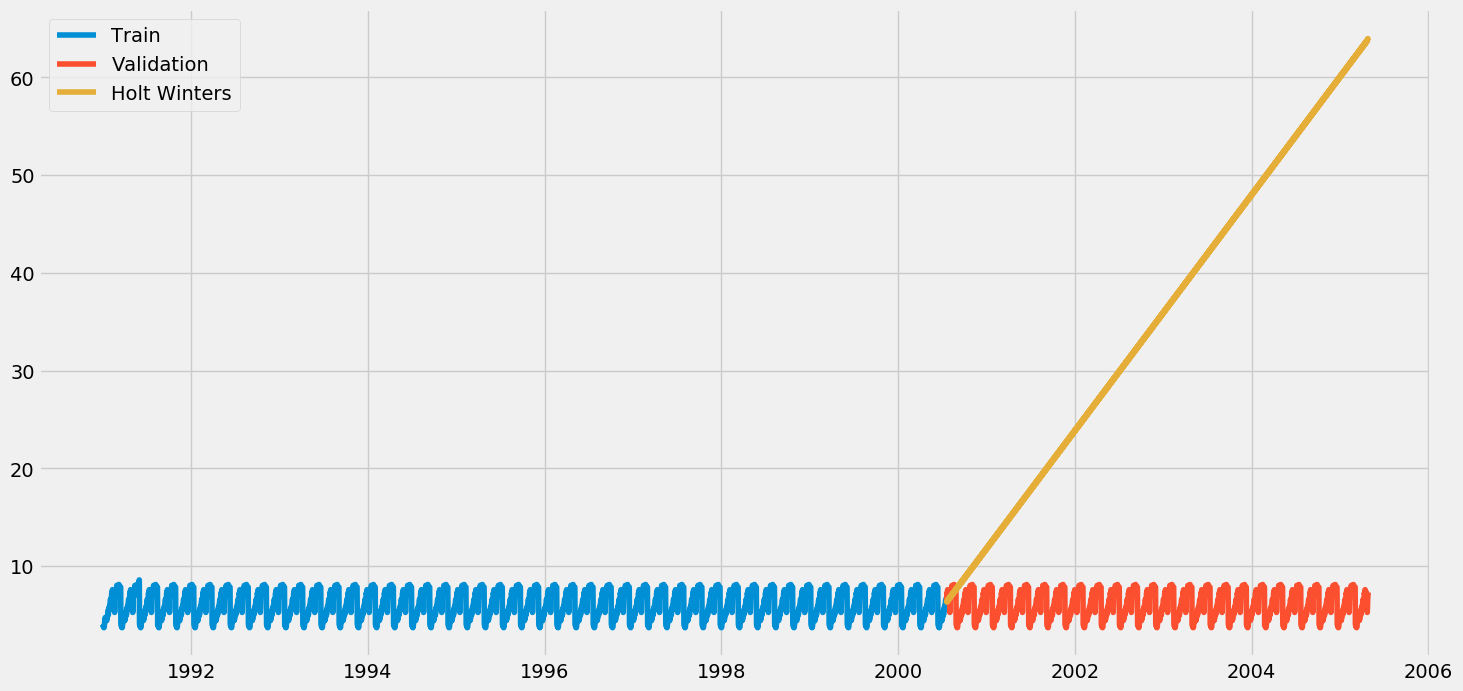

In [50]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Eto']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Eto'], label = 'Train')
plt.plot(valid['Eto'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [51]:
#RMS error for Holt Winter

rmse = sqrt(mean_squared_error(valid['Eto'], y_hat_avg['Holt_Winter']))
rmse

33.39463492783716

In [52]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [53]:
#Merge test and test_original on day,month and year
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['Eto'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

ID_x  Temperature_x  Heat Index_x  Humidity_x  Water flow_x  \
0  5232           37.7         33.08         1.4             0   
1  5233           35.9         31.87         4.0             0   
2  5234           35.0         31.31         5.8             0   
3  5235           33.0         30.36        11.0             0   
4  5236           30.9         28.89        16.7             0   

   Soil Moisture_x  Water quantity_x  day  prediction  ID_y  Temperature_y  \
0            26.64                 0   28    6.187125  5232           37.7   
1            26.64                 0   29    6.353970  5233           35.9   
2            26.39                 0   30    6.297521  5234           35.0   
3            26.39                 0    1    6.406496  5235           33.0   
4            26.39                 0    2    6.511100  5236           30.9   

   Heat Index_y  Humidity_y  Water flow_y  Soil Moisture_y  Water quantity_y  \
0         33.08         1.4             0            26.64                 0   
1         31.87         4.0             0            26.64                 0   
2         31.31         5.8             0            26.39                 0   
3         30.36        11.0             0            26.39                 0   
4         28.89        16.7             0            26.39                 0   

   Hour  ratio         Eto  
0     0    1.0  148.491008  
1     0    1.0  152.495284  
2     0    1.0  151.140496  
3     0    1.0  153.755897  
4     0    1.0  156.266402

In [54]:
prediction['ID']= prediction['ID_y']
submission = prediction.drop(['ID_x','ID_y','day','Hour','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['ID','Eto']).to_csv('Holt winters2.csv')

# ARIMA MODEL

In [55]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

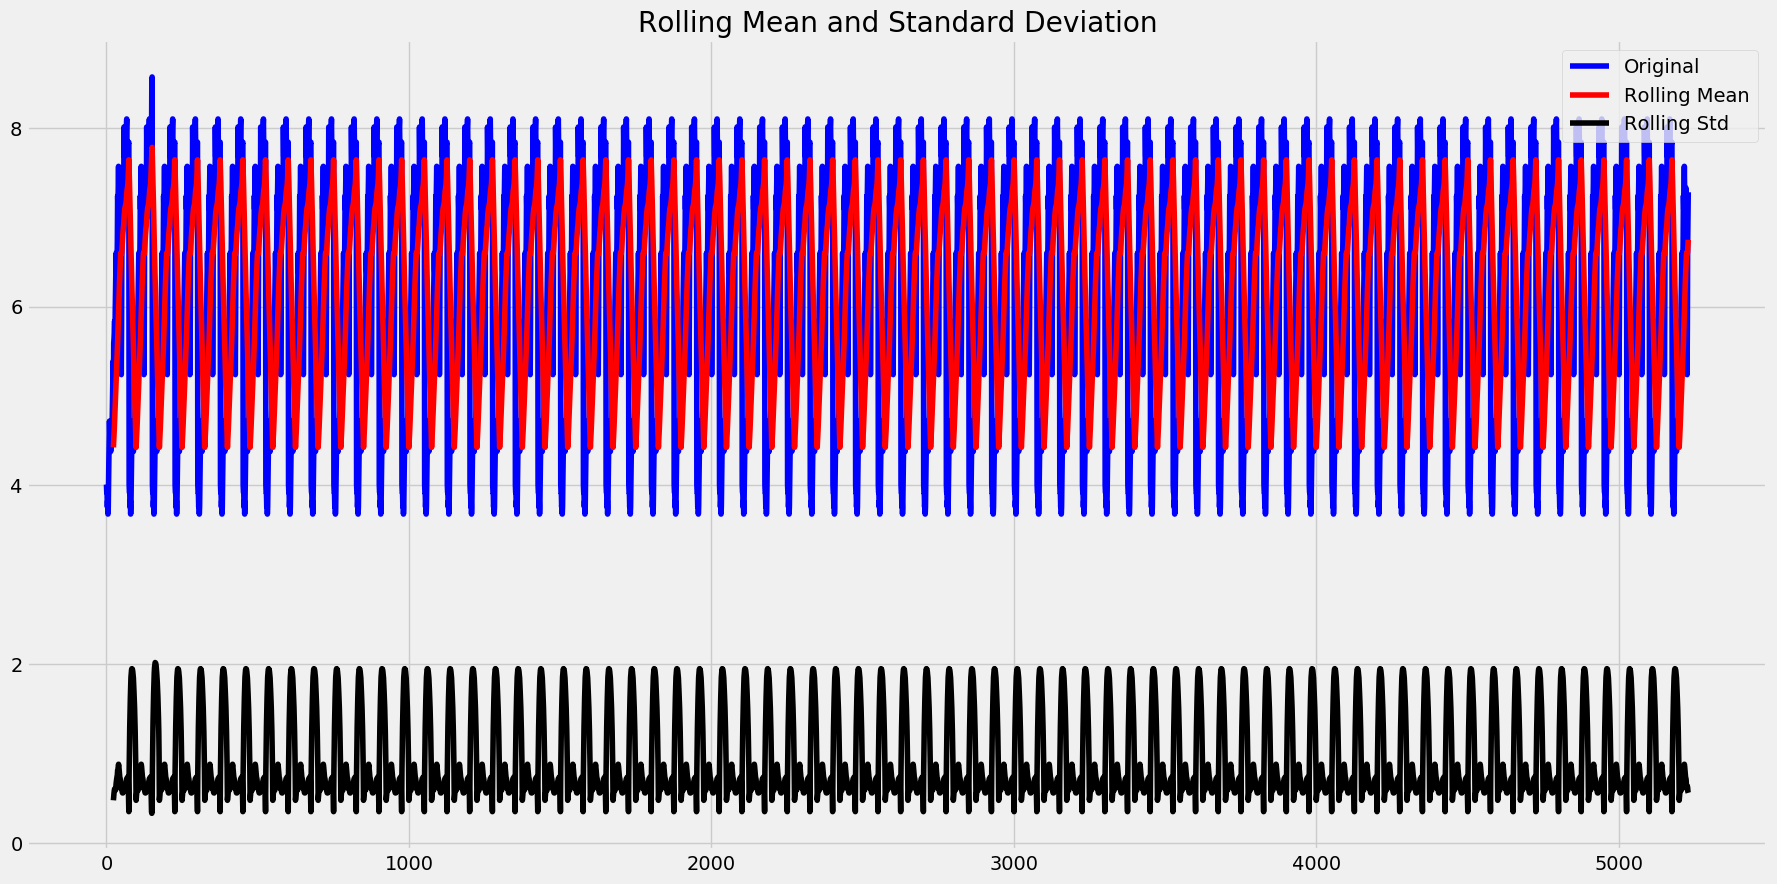

Results of Dickey Fuller test: 
Test Statistics                 -21.945430
p-value                           0.000000
# Lag Used                       33.000000
Number of Observations Used    5197.000000
Critical Value (1%)              -3.431609
Critical Value (5%)              -2.862096
Critical Value (10%)             -2.567066
dtype: float64


In [56]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Eto'])

In [57]:
Train_log = np.log(Train['Eto'])
valid_log = np.log(valid['Eto'])

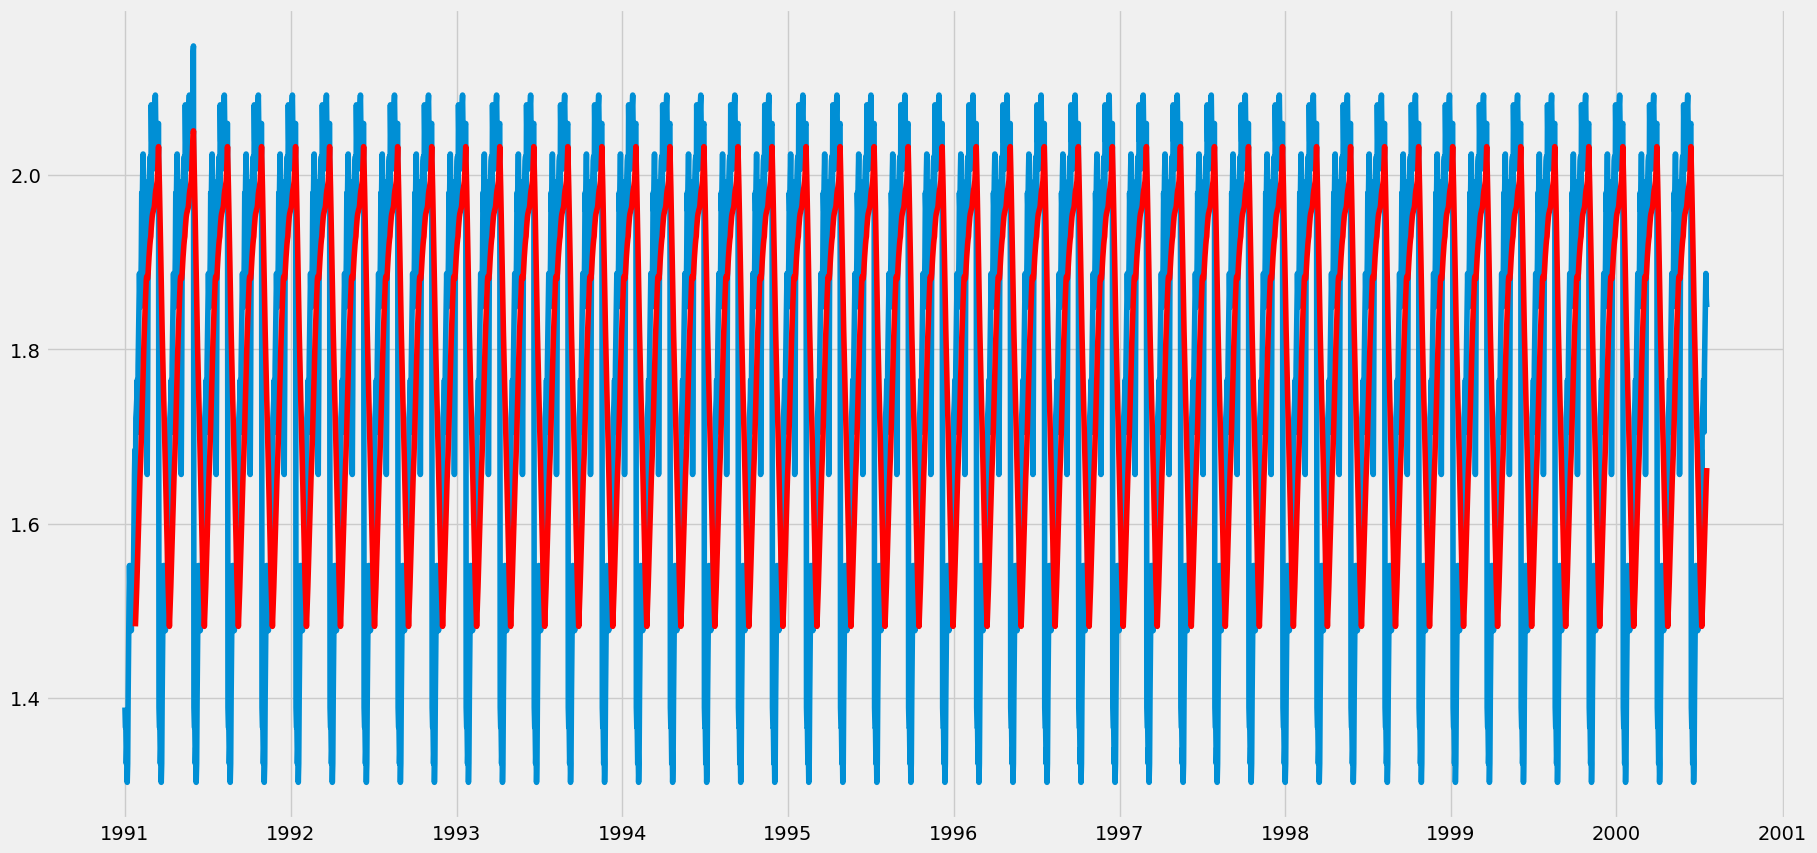

In [58]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

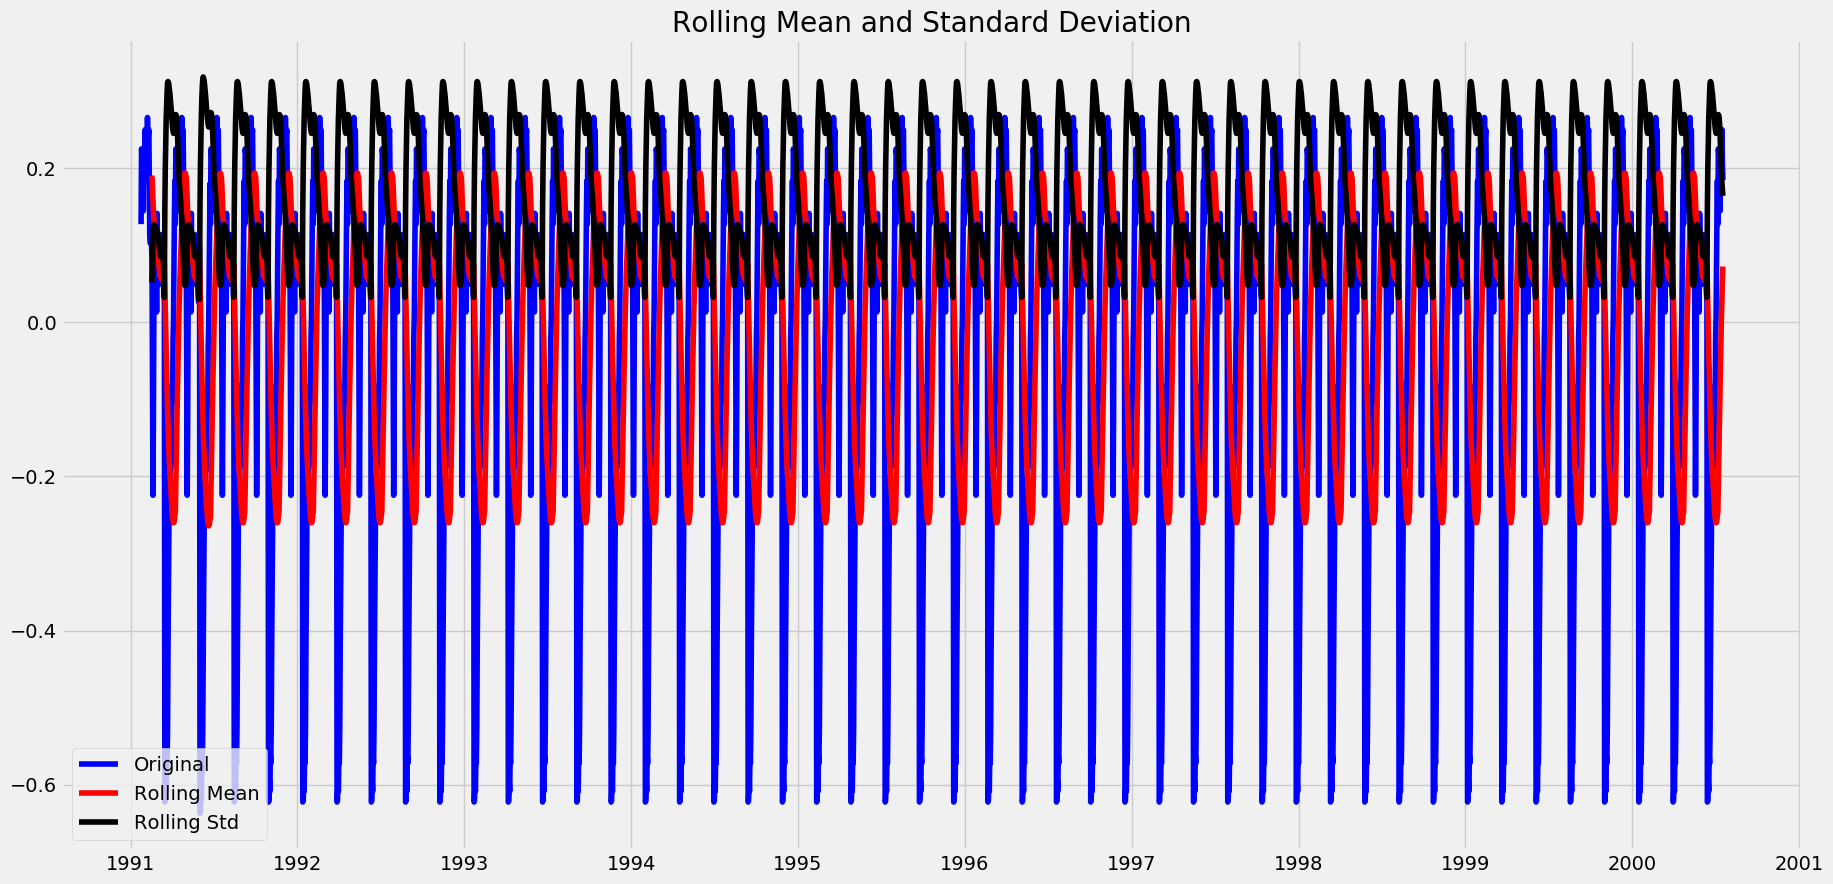

Results of Dickey Fuller test: 
Test Statistics               -1.383214e+01
p-value                        7.557998e-26
# Lag Used                     3.000000e+01
Number of Observations Used    3.433000e+03
Critical Value (1%)           -3.432256e+00
Critical Value (5%)           -2.862382e+00
Critical Value (10%)          -2.567218e+00
dtype: float64


In [59]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

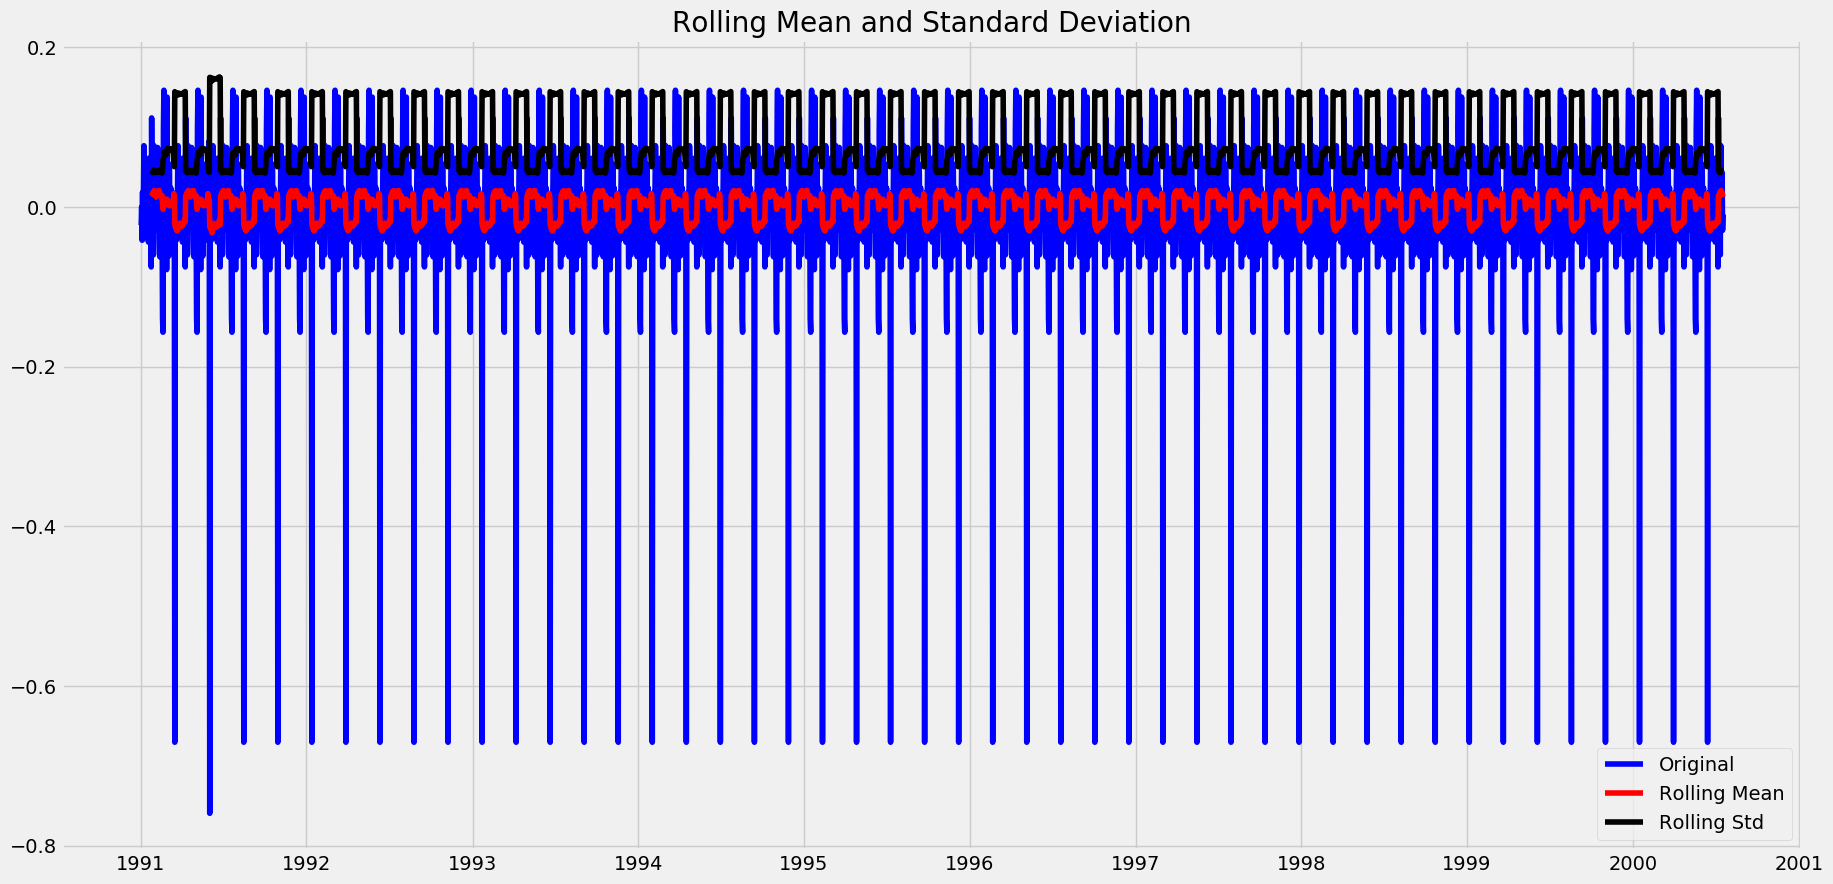

Results of Dickey Fuller test: 
Test Statistics               -1.392069e+01
p-value                        5.302531e-26
# Lag Used                     2.800000e+01
Number of Observations Used    3.457000e+03
Critical Value (1%)           -3.432243e+00
Critical Value (5%)           -2.862376e+00
Critical Value (10%)          -2.567215e+00
dtype: float64


In [60]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

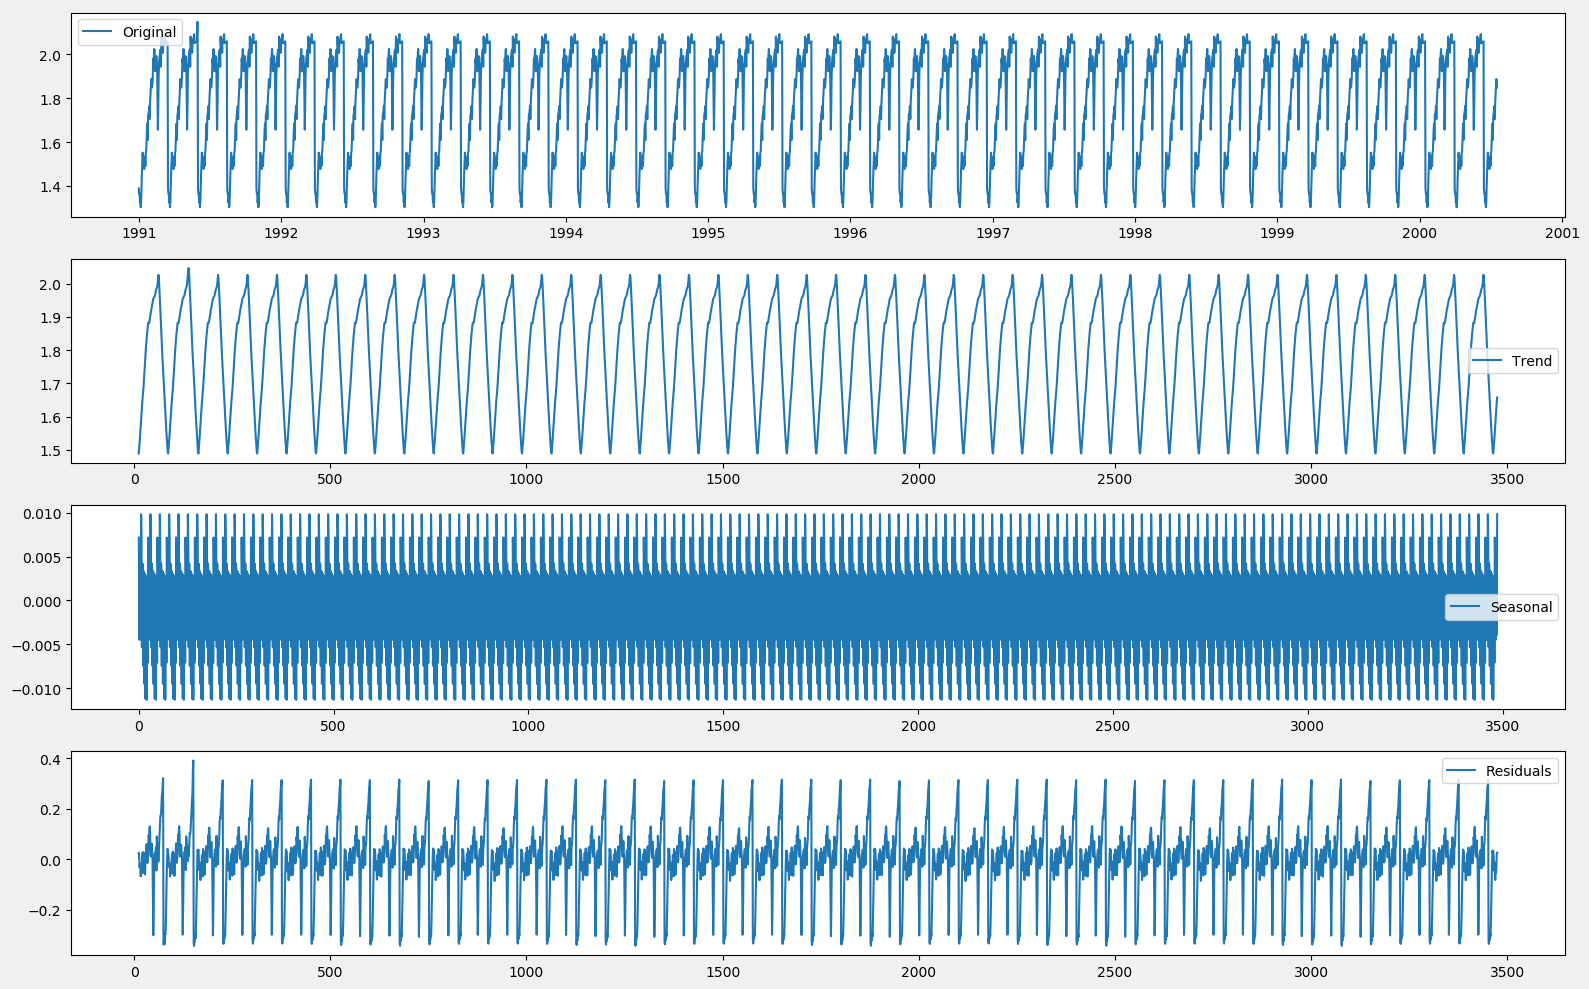

In [61]:
#removing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Eto.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

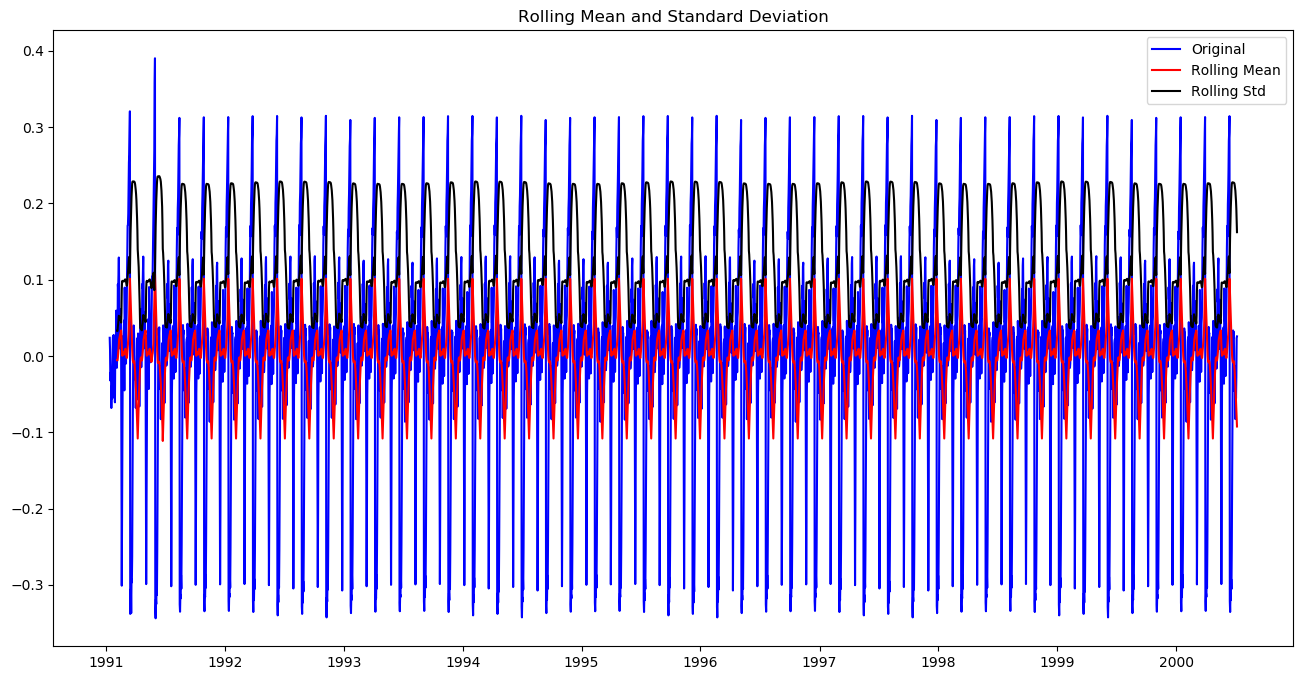

Results of Dickey Fuller test: 
Test Statistics               -1.565690e+01
p-value                        1.571317e-28
# Lag Used                     2.800000e+01
Number of Observations Used    3.434000e+03
Critical Value (1%)           -3.432256e+00
Critical Value (5%)           -2.862382e+00
Critical Value (10%)          -2.567218e+00
dtype: float64


In [62]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [63]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

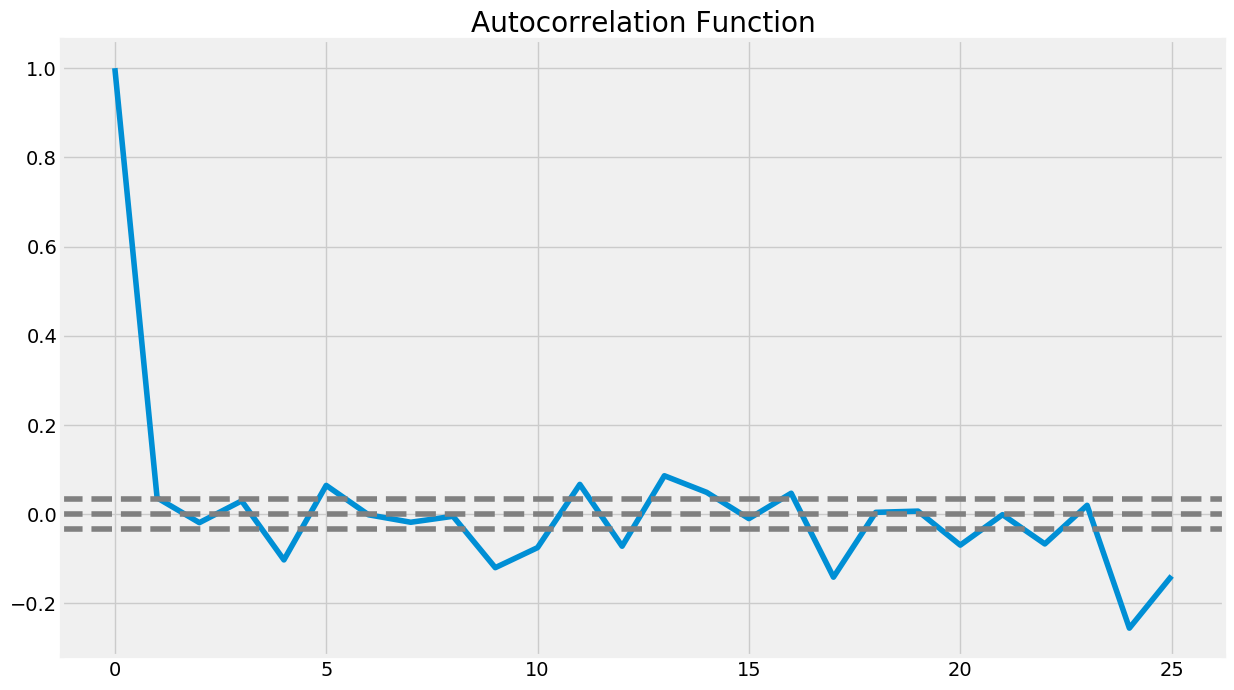

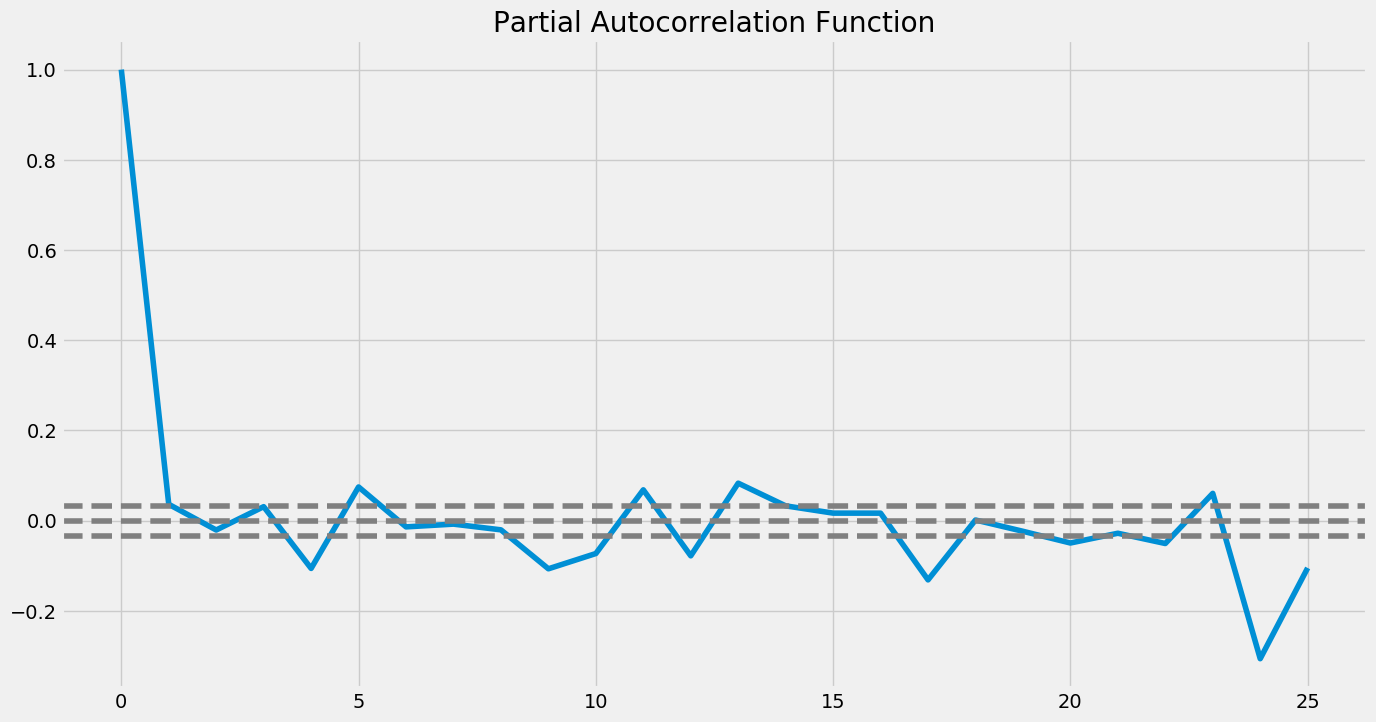

In [64]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()


# AR Model


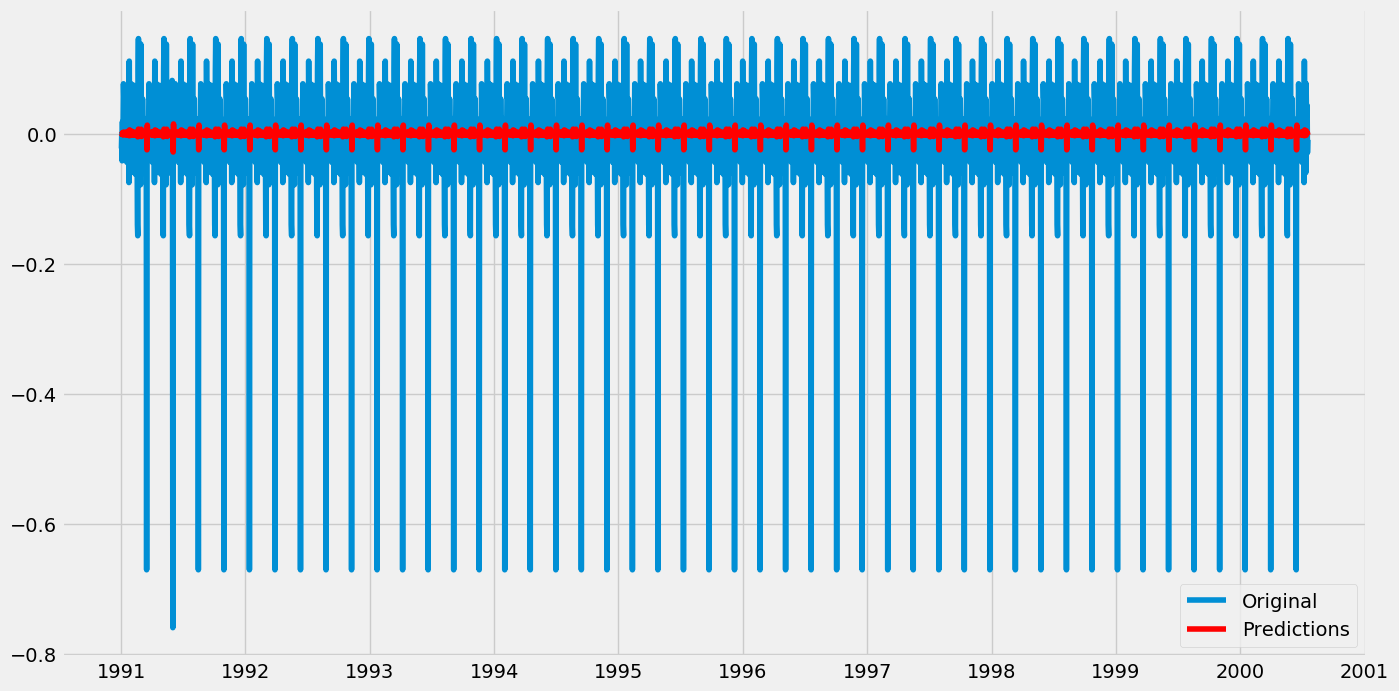

In [65]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')


In [66]:
AR_predict = results_AR.predict(start="2000-07-19", end="2005-04-27")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['Eto'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

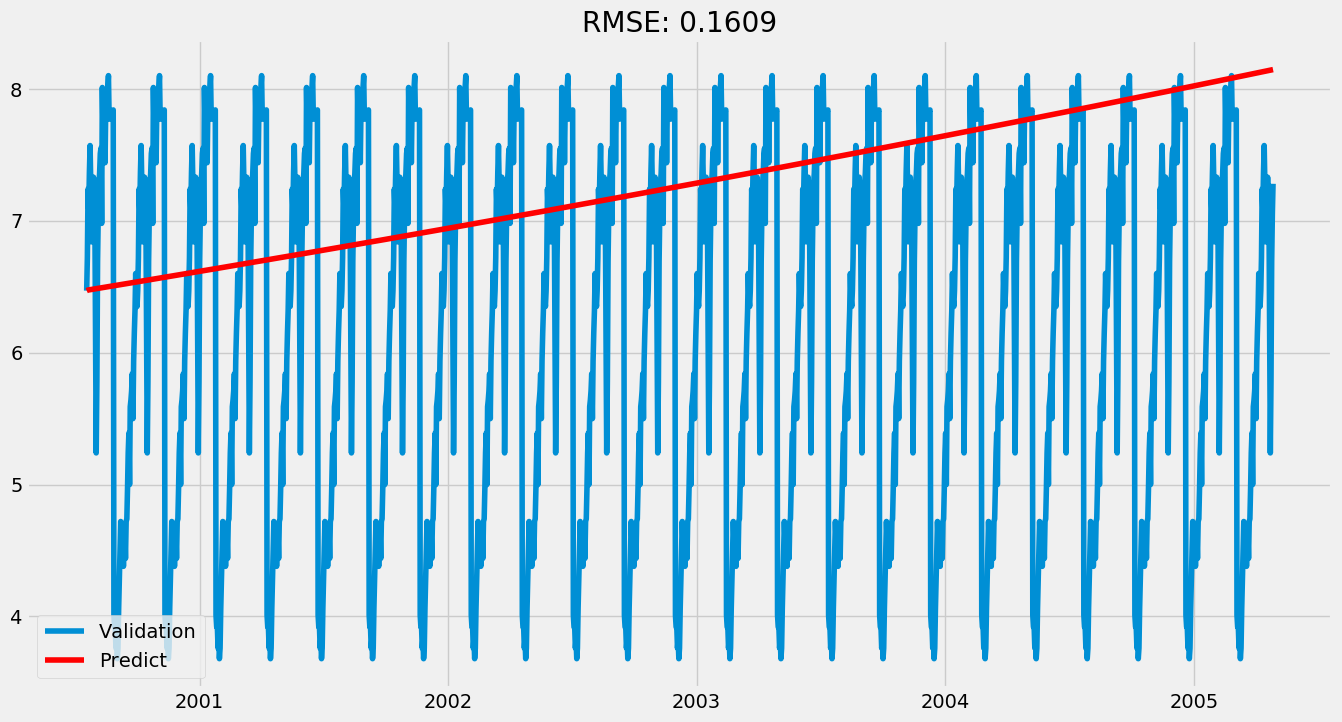

In [67]:
plt.figure(figsize = (15,8))
plt.plot(valid['Eto'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Eto']))/valid.shape[0]))
plt.show()

# Moving Average Model


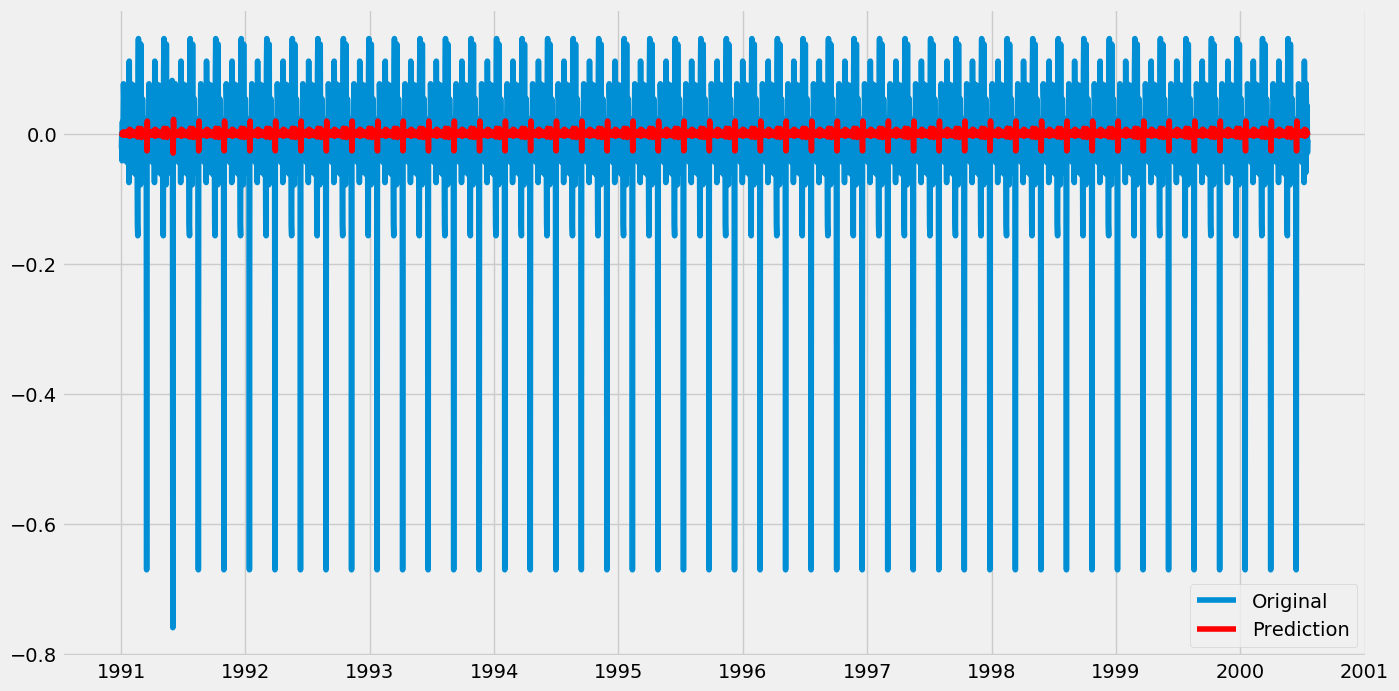

In [68]:
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [69]:
MA_predict = results_MA.predict(start="2000-07-19", end="2005-04-27")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Eto'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

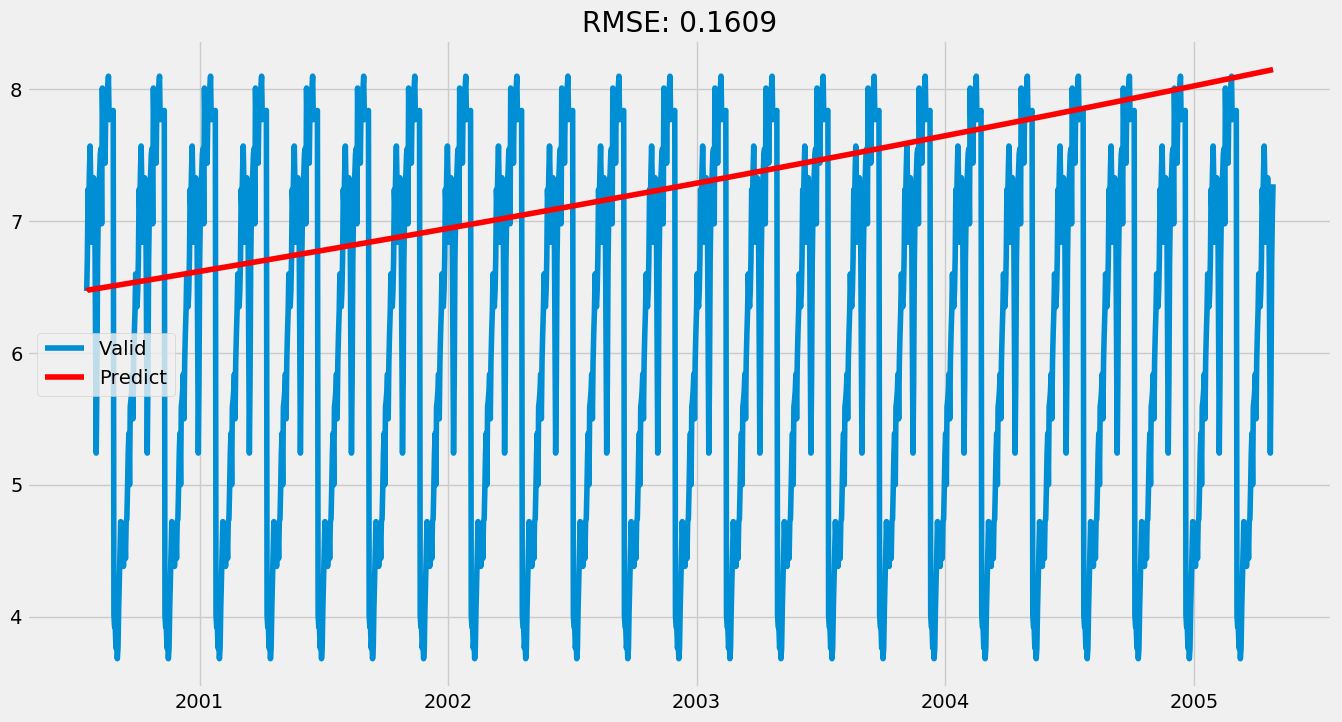

In [70]:
plt.figure(figsize = (15,8))
plt.plot(valid['Eto'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Eto']))/valid.shape[0]))
plt.show()

# Combined Model


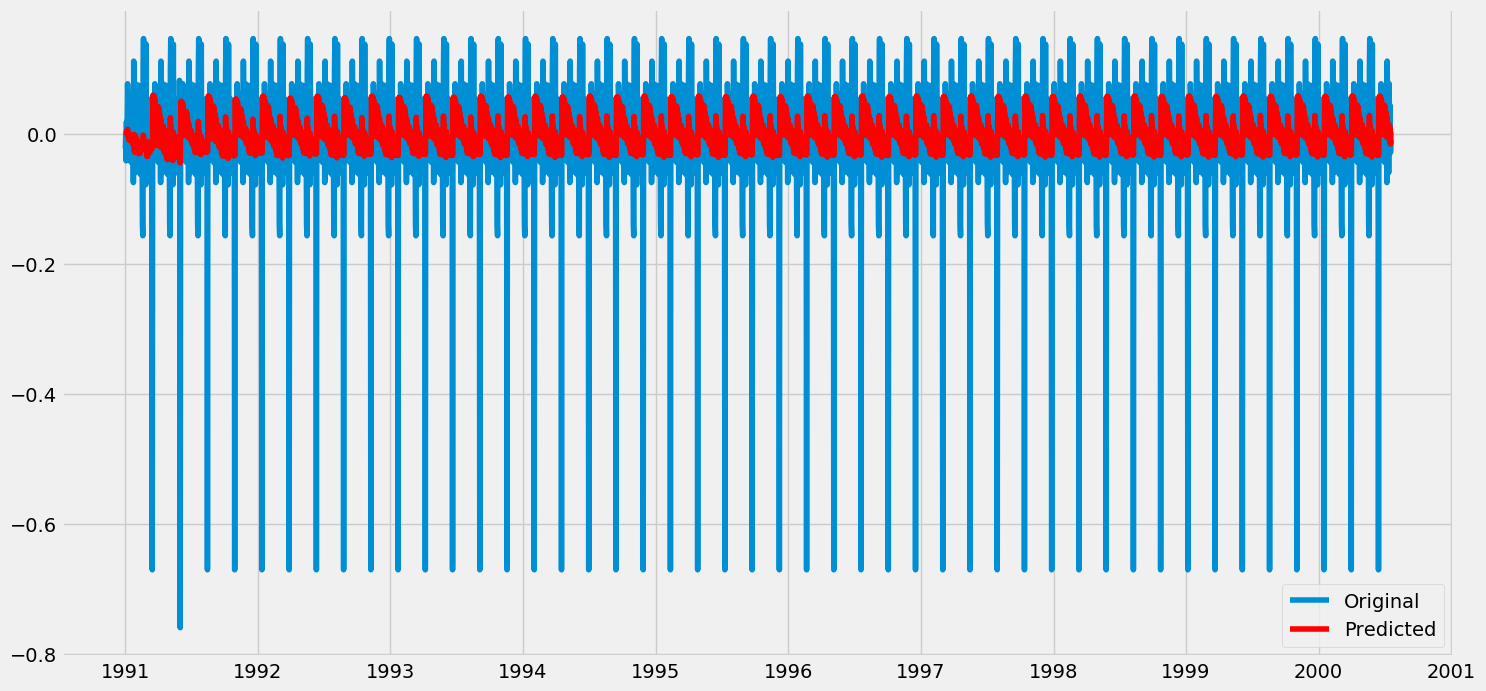

In [71]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()


In [72]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Eto'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Eto'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Eto']))/given_set.shape[0]))
    plt.show()

In [73]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Eto'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Eto']))/given_set.shape[0]))
    plt.show()

In [74]:
ARIMA_predict_diff=results_ARIMA.predict(start="2000-07-19", end="2005-04-27")

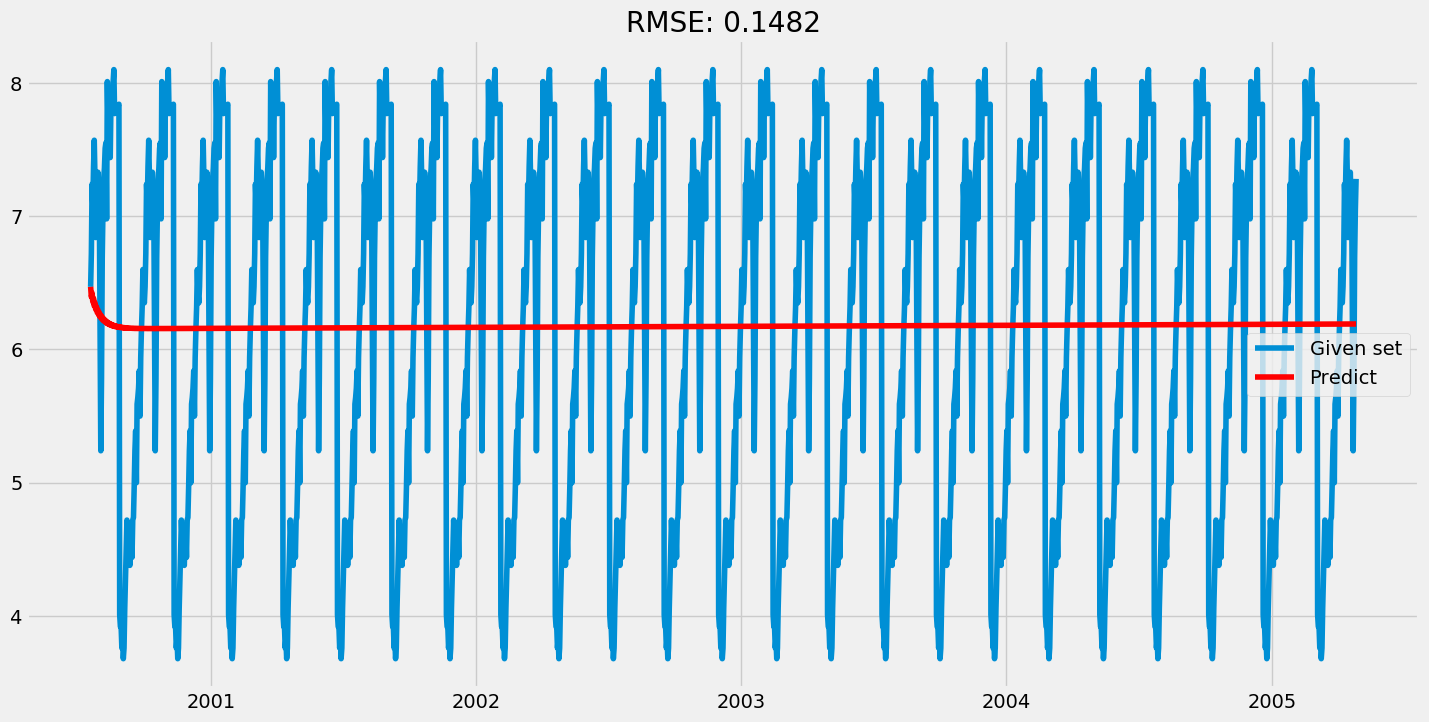

In [75]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, valid)

# SARIMAX Model


In [76]:
import statsmodels.api as sm


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'SARIMAX Model')

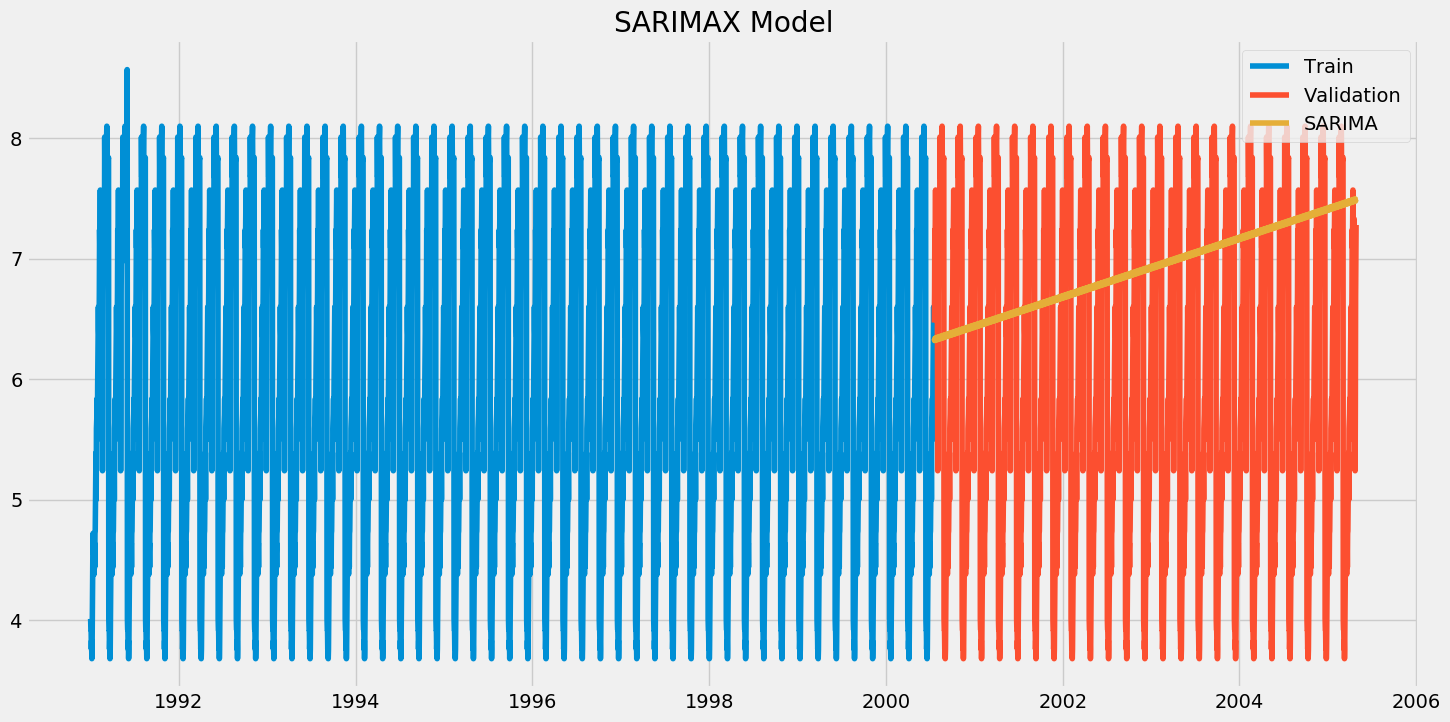

In [78]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Eto, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2000-07-19", end="2005-04-27", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Eto'], label = "Train")
plt.plot(valid.Eto, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [79]:
rms = sqrt(mean_squared_error(valid.Eto, y_hat_avg.SARIMA))
print(rms)

1.6052938975399396


# Covert to Hourly Predictions


In [80]:
redict = fit1.predict(start="2000-07-19", end="2005-04-27", dynamic=True)

In [81]:
test['prediction']=predict

In [82]:
#Merge test and test_original on day,month and year
merge = pd.merge(test,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Eto'] = prediction['prediction'] * prediction['ratio'] * 24

In [83]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Eto']).to_csv('SARIMAX2.csv')